#  Центральная предельная теорема своими руками
## Распределение хи-квадрат
В качестве образца используется распределение хи-квадрат c одним параметром k:

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

Выбранный параметр, а также математическое ожидание и дисперсия для этого распределения:

$$ k\;=\;3\\EX\;=\;k\\DX\;=\;2k $$

In [251]:
%pylab inline
from scipy import stats

chi_k = 3
chi2 = stats.chi2(chi_k)
ex = chi_k
dx = 2 * chi_k

# Отрисовка гистограммы выборки sample и PDF некоторой функции statf
def plot_pdf_hist(statf, sample):
    x = np.linspace(min(sample), max(sample), 100)
    pdf = statf.pdf(x)
    
    plt.hist(sample, bins = 80, density = True, label = 'fraction of samples')
    plt.plot(x, pdf, 'xkcd:crimson', label = 'theoretical pdf')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend()
    plt.show()
    
# Среднее значение по выборке sample
def mean(sample):
    sum = 0
    for val in sample:
        sum += val
    return sum / len(sample)

# Генерируем m выборок объемом n для распределения statf
# Выводим гистрограмму средних этих выборок и график PDF
# нормального распределения для указанных ex, dx, n
def clt(statf, ex, dx, n, m):
    means = []
    for _ in range(0, m):
        means.append(mean(statf.rvs(n)))

    norm_rv = stats.norm(ex, math.sqrt(dx / n))
    plot_pdf_hist(norm_rv, means)    

Populating the interactive namespace from numpy and matplotlib


График теоретической плотности вероятности и гистограммы выборки размером 1000

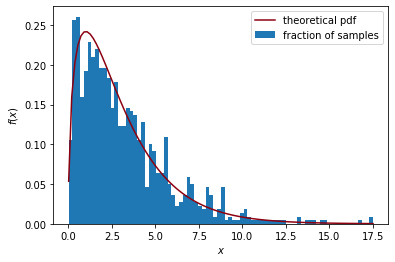

In [252]:
plot_pdf_hist(chi2, chi2.rvs(1000))

### Оценка распределения выборочного среднего 

Выборка объемом: 5

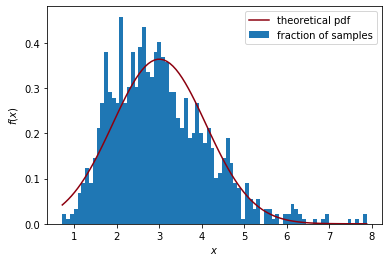

In [253]:
clt(chi2, ex, dx, 5, 1000)

Выборка объемом: 10

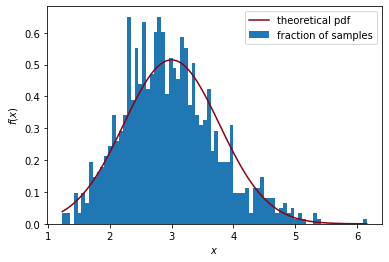

In [254]:
clt(chi2, ex, dx, 10, 1000)

Выборка объемом: 50

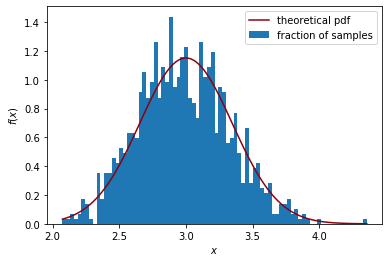

In [255]:
clt(chi2, ex, dx, 50, 1000)

Выборка объемом: 200

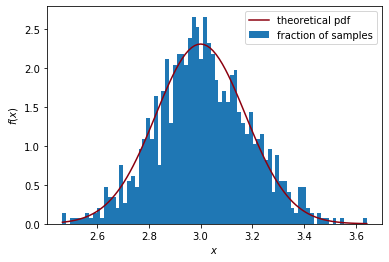

In [257]:
clt(chi2, ex, dx, 200, 1000)

По полученным графикам при различных объемах случайной выборки, очевидно, что с увеличением объема выборки точность нормальной аппроксимации распределения выборочных средних увеличивается.